In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
credit_df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
credit_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [15]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = credit_df["loan_status"]

# Separate the X variable, the features
X = credit_df.drop("loan_status", axis=1)

In [16]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [17]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [30]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
22220,9600.0,7.215,48500,0.381443,4,0,18500
64200,10500.0,7.604,52200,0.425287,4,1,22200
54218,8800.0,6.845,45000,0.333333,3,0,15000
45910,9400.0,7.125,47600,0.369748,3,0,17600
22572,7900.0,6.496,41700,0.280576,2,0,11700
...,...,...,...,...,...,...,...
20609,7200.0,6.177,38700,0.224806,1,0,8700
21440,10000.0,7.389,50100,0.401198,4,1,20100
73349,10200.0,7.463,50800,0.409449,4,1,20800
50057,11100.0,7.838,54400,0.448529,5,1,24400


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [31]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression()

# Fit the model using training data
lr_model.fit(X_train, y_train)

LogisticRegression()

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [35]:
# Make a prediction using the testing data
predictions = lr_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], shape=(11631,))

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

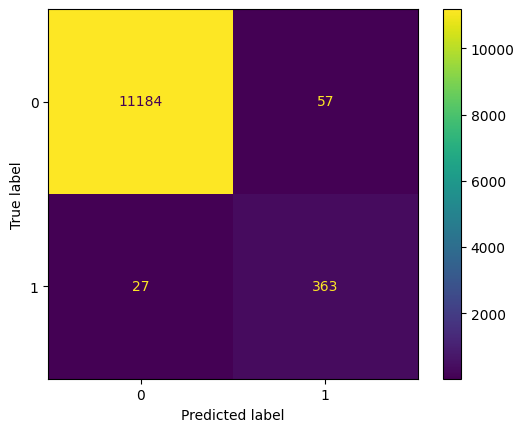

In [42]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr_model.classes_)
disp.plot()

In [38]:
# Print the classification report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11241
           1       0.86      0.93      0.90       390

    accuracy                           0.99     11631
   macro avg       0.93      0.96      0.95     11631
weighted avg       0.99      0.99      0.99     11631



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model favors calling the class '0' (healthy loan) compared to calling '1' (high risk loan). The resulting precision is 1.00 which for class 0 only whereas precision for class 1 is 0.86. The f1-score for 0 is higher than class 1 because there's more sample size for 0. Overall IF the aim of the objective is to find out how well healthy loans are doing, then this model shows that 0 is doing really well.

---